In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import callbacks
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import random
import math
import time
from deap import base, creator, tools, algorithms

In [75]:
df=pd.read_csv("Livercancer.csv")  

In [76]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [77]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


for i in range(583):
    if df["Dataset"][i]==2:
        df["Dataset"][i]=1
    else :df["Dataset"][i]=0

In [79]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,0


In [80]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [82]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [83]:
df.shape

(583, 11)

In [84]:
df.dropna(inplace=True)

In [85]:
df.shape

(579, 11)

In [86]:
label_encoder = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0


### Data Visualization

<Axes: xlabel='Total_Bilirubin', ylabel='Count'>

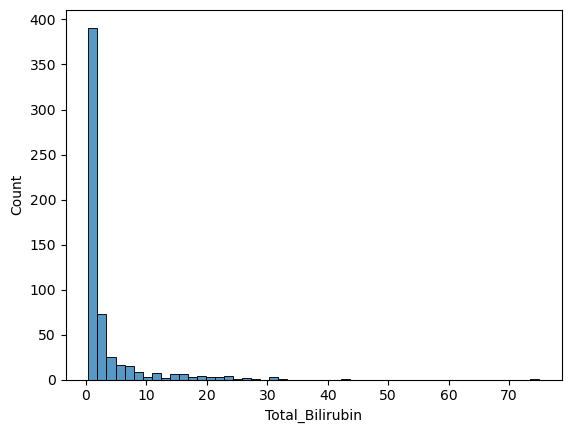

In [95]:
sns.histplot(df.Total_Bilirubin,bins=50)


<Axes: xlabel='Direct_Bilirubin', ylabel='Count'>

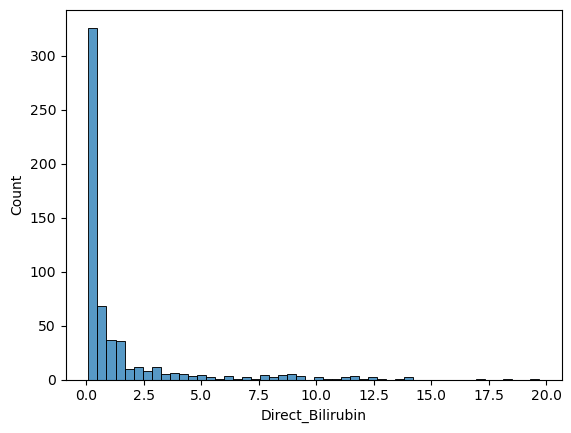

In [96]:
sns.histplot(df.Direct_Bilirubin,bins=50)


<Axes: xlabel='Alkaline_Phosphotase', ylabel='Count'>

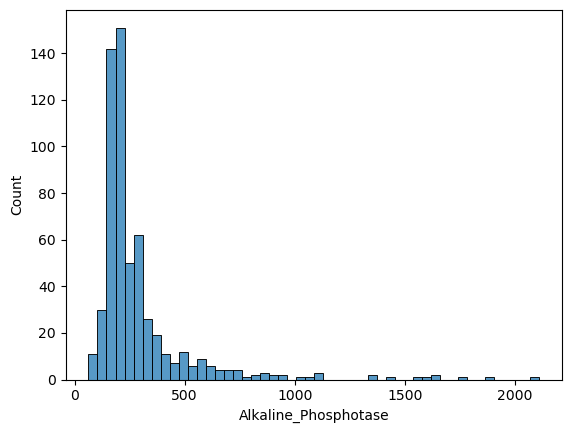

In [97]:
sns.histplot(df.Alkaline_Phosphotase,bins=50)


<Axes: xlabel='Alamine_Aminotransferase', ylabel='Count'>

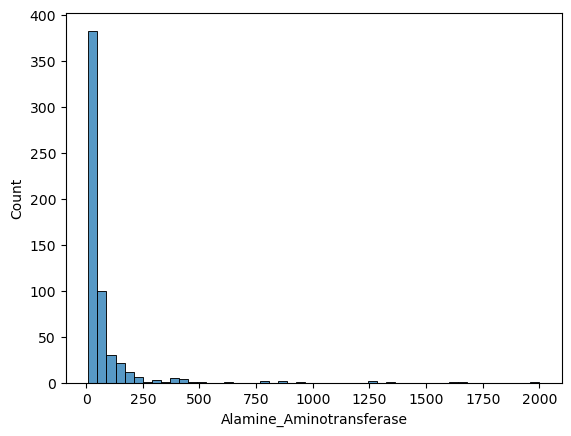

In [90]:
sns.histplot(df.Alamine_Aminotransferase,bins=50)

<Axes: xlabel='Aspartate_Aminotransferase', ylabel='Count'>

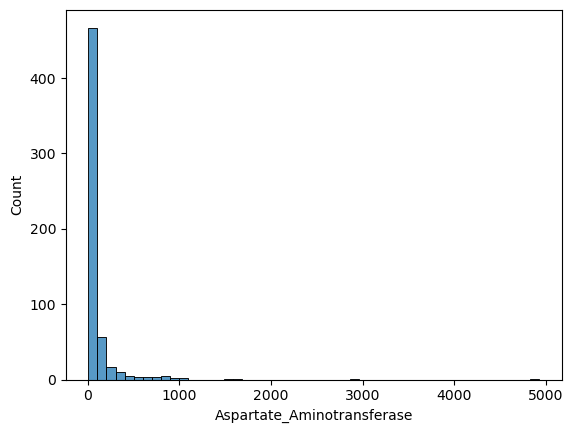

In [91]:
sns.histplot(df.Aspartate_Aminotransferase,bins=50)

<Axes: xlabel='Total_Protiens', ylabel='Count'>

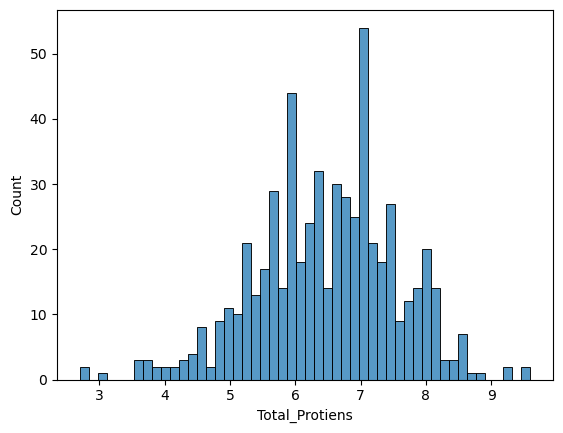

In [92]:
sns.histplot(df.Total_Protiens,bins=50)

<Axes: xlabel='Albumin', ylabel='Count'>

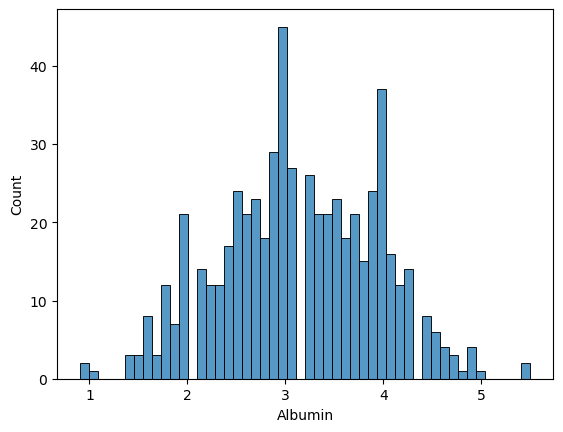

In [93]:
sns.histplot(df.Albumin,bins=50)

<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Count'>

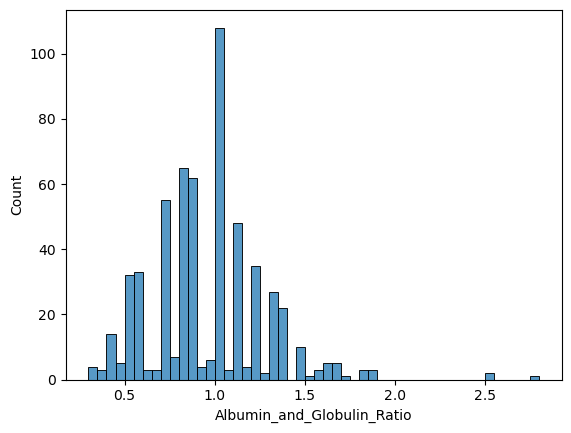

In [94]:
sns.histplot(df.Albumin_and_Globulin_Ratio,bins=50)

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

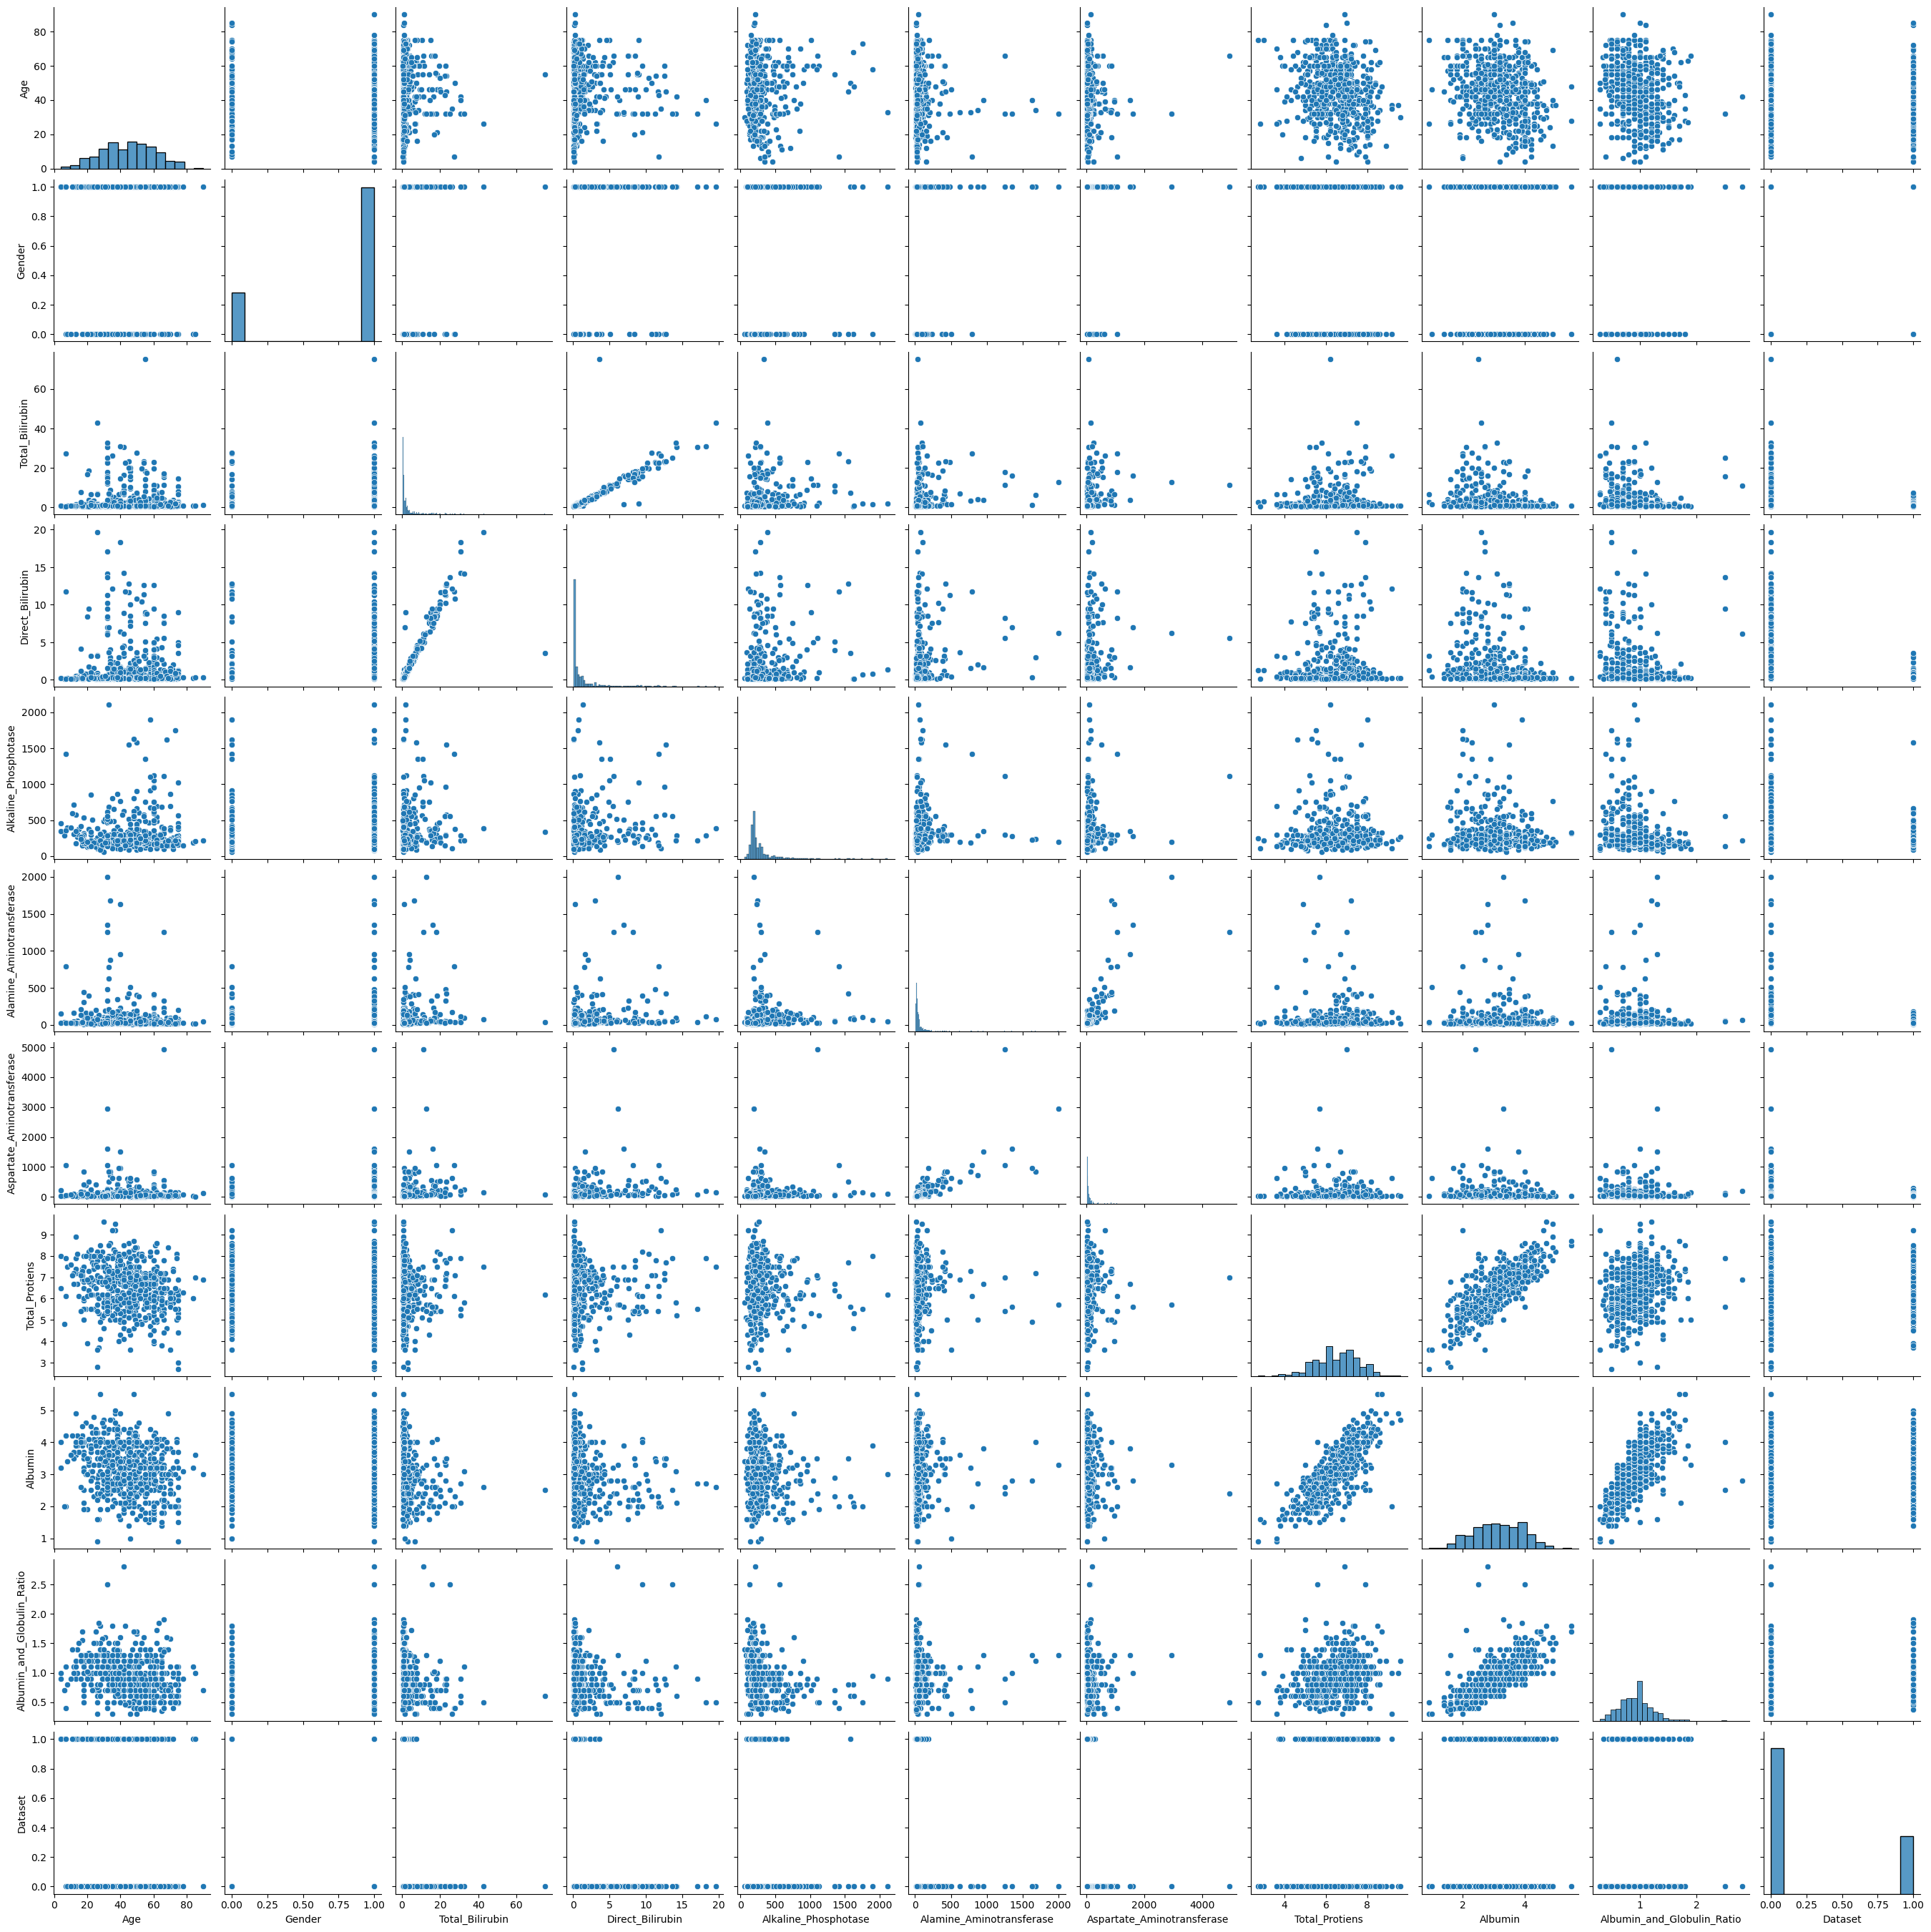

In [100]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

In [14]:
Y=df["Dataset"]
df.drop("Dataset",axis=1,inplace=True)
df.drop("Gender",axis=1,inplace=True)

In [45]:
X=df
X

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00


<Axes: >

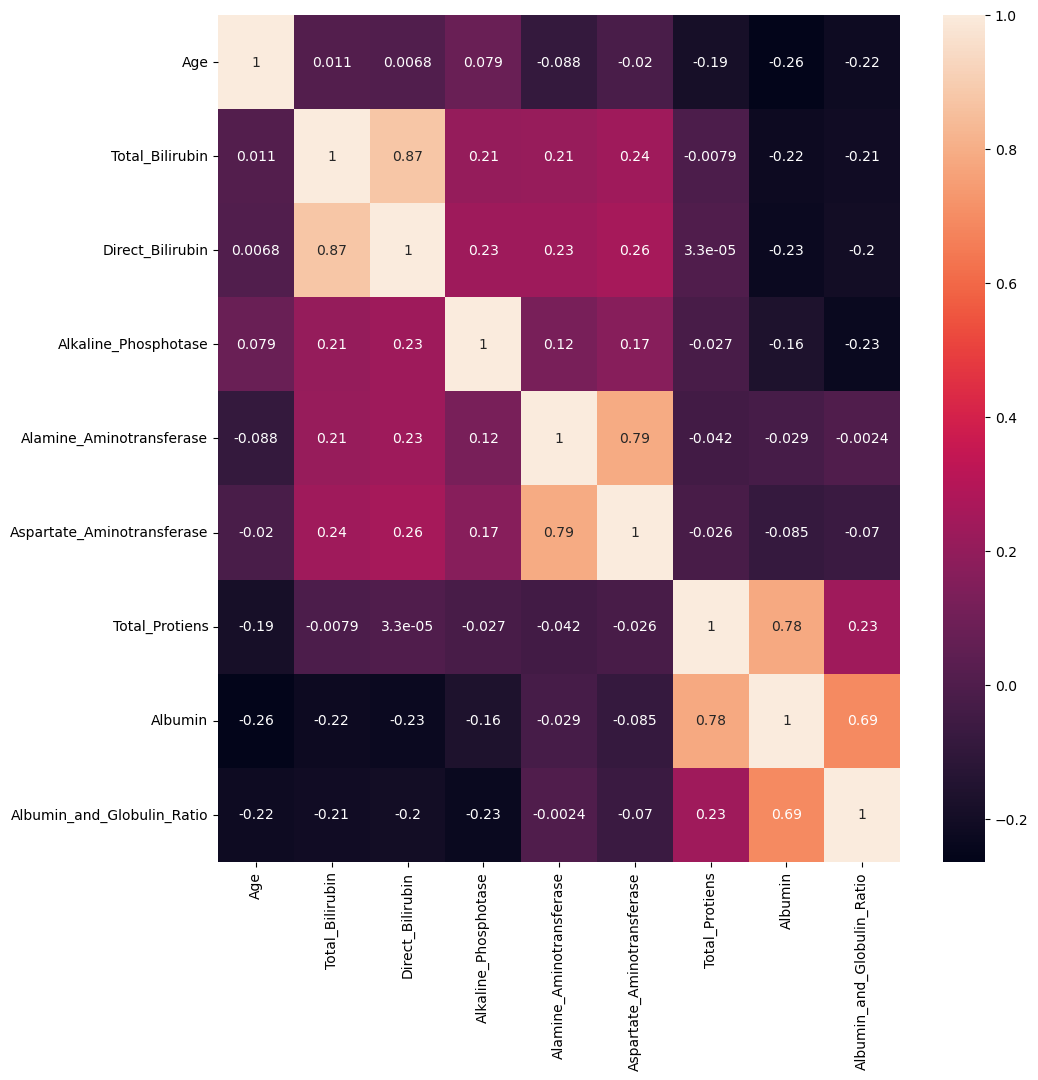

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(),cbar=True,annot=True)

## Splitting into training set and test set

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [18]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(463, 9) (116, 9) (463,) (116,)


### Normalizing the data

In [19]:
#Normalizing the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Logistic Regression

In [20]:
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)
model_predict=model.predict(x_test)

In [21]:
lr_acc_score=accuracy_score(y_test,model_predict)

In [22]:
lr_acc_score

0.6810344827586207

In [23]:
confusion_matrix(y_test,model_predict) 

array([[70,  3],
       [34,  9]], dtype=int64)

### Decision Tree

In [24]:
model_dt=DecisionTreeClassifier(random_state=42,max_depth=None)
model_dt.fit(x_train,y_train)
model_dt_predict=model_dt.predict(x_test)

In [25]:
dt_acc_score=accuracy_score(y_test,model_dt_predict)

In [26]:
dt_acc_score

0.7068965517241379

In [27]:
confusion_matrix(y_test,model_dt_predict)

array([[59, 14],
       [20, 23]], dtype=int64)

### Random Forest

In [28]:
rf=RandomForestClassifier(max_depth=None,random_state=42)
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)

In [29]:
rf_acc_score=accuracy_score(y_test,rf_predict)

In [30]:
rf_acc_score

0.6810344827586207

In [31]:
confusion_matrix(y_test,rf_predict) 

array([[65,  8],
       [29, 14]], dtype=int64)

In [32]:
early_Stopping=callbacks.EarlyStopping(min_delta=0.001,patience=20,restore_best_weights=True)

### Neural Network

In [33]:
seed_value = 42

# Set the random seed for TensorFlow
tf.random.set_seed(seed_value)

# (Optional) Set the NumPy random seed (Keras uses NumPy)
import numpy as np
np.random.seed(seed_value)
model=Sequential([
           Dense(units=10,activation="relu"),
           
            Dense(units=8,activation="relu"),
           Dense(units=1,activation="sigmoid")
                 ]
    
)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss=tf.keras.losses.BinaryCrossentropy())    
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100, callbacks=[early_Stopping],)


Epoch 1/100

15/15 [==============================] - 3s 43ms/step - loss: 0.8178 - val_loss: 0.7783
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8173 - val_loss: 0.7780
Epoch 3/100
15/15 [==============================] - 0s 10ms/step - loss: 0.8168 - val_loss: 0.7778
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 0.8162 - val_loss: 0.7775
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 0.8157 - val_loss: 0.7772
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 0.8152 - val_loss: 0.7769
Epoch 7/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8147 - val_loss: 0.7767
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 0.8142 - val_loss: 0.7764
Epoch 9/100
15/15 [==============================] - 0s 9ms/step - loss: 0.8137 - val_loss: 0.7761
Epoch 10/100
15/15 [==============================] - 0s 10ms/step - loss: 0.8131 - val_loss: 0.7759
E

15/15 [==============================] - 0s 10ms/step - loss: 0.7816 - val_loss: 0.7598
Epoch 80/100
15/15 [==============================] - 0s 10ms/step - loss: 0.7812 - val_loss: 0.7596
Epoch 81/100
15/15 [==============================] - 0s 9ms/step - loss: 0.7808 - val_loss: 0.7594
Epoch 82/100
15/15 [==============================] - 0s 9ms/step - loss: 0.7804 - val_loss: 0.7592
Epoch 83/100
15/15 [==============================] - 0s 10ms/step - loss: 0.7800 - val_loss: 0.7590
Epoch 84/100
15/15 [==============================] - 0s 12ms/step - loss: 0.7796 - val_loss: 0.7588
Epoch 85/100
15/15 [==============================] - 0s 9ms/step - loss: 0.7792 - val_loss: 0.7586
Epoch 86/100
15/15 [==============================] - 0s 10ms/step - loss: 0.7788 - val_loss: 0.7584
Epoch 87/100
15/15 [==============================] - 0s 10ms/step - loss: 0.7784 - val_loss: 0.7582
Epoch 88/100
15/15 [==============================] - 0s 9ms/step - loss: 0.7779 - val_loss: 0.7580
Epoch 8

In [34]:
res=model.predict(x_test)

4/4 [==============================] - 0s 5ms/step


### ROC Curve

ROC_AUC Score :  0.32844855049378785
Function for ROC_AUC Score :  0.32844855049378785
Threshold value is: inf


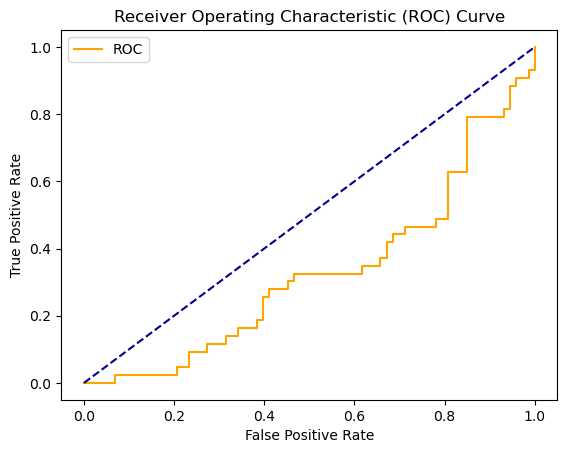

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
fpr, tpr, thresholds = roc_curve(y_test, res)
roc_auc = auc(fpr, tpr)
print("ROC_AUC Score : ",roc_auc)
print("Function for ROC_AUC Score : ",roc_auc_score(y_test, res))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [36]:
prediction_class=[1 if prob>optimal_threshold else 0 for prob in np.ravel(res)]

In [37]:
prediction_class

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [38]:
accuracy_score(y_test,prediction_class)

0.6293103448275862

### Genetic Algorithm for optimization on Random Forest Classifier

In [39]:

def evaluate_model(individual):
    n_estimators, max_depth = individual
    # Create a Random Forest classifier with the given parameters
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    clf.fit(x_train, y_train)
    # Evaluate the classifier's accuracy on the test set
    accuracy = accuracy_score(y_test, clf.predict(x_test))
    return accuracy,

# Create the creator for the evaluation function
creator.create("FitnessEvaluation", base.Fitness, weights=(1.0,))
creator.create("IndividualParams", list, fitness=creator.FitnessEvaluation)

# Define the genetic algorithm toolbox
toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 10, 100)  # Possible values for n_estimators and max_depth
toolbox.register("individual", tools.initCycle, creator.IndividualParams, (toolbox.attr_int, toolbox.attr_int), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=10, up=100, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_model)

# Genetic Algorithm parameters
population_size = 50
generations = 10
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# Initialize the population
population = toolbox.population(n=population_size)

# Run the Genetic Algorithm
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=cxpb, mutpb=mutpb)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_n_estimators, best_max_depth = best_individual
best_accuracy = evaluate_model(best_individual)[0]

print("Best Hyperparameters:")
print("n_estimators:", best_n_estimators)
print("max_depth:", best_max_depth)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters:
n_estimators: 13
max_depth: 33
Best Accuracy: 0.7068965517241379


### Genetic Algorithm for optimization on Neural Network

In [40]:
def evaluate_nn(individual):
    # Unpack the individual containing hyperparameters
    hidden_layer_size, num_dense_layers = individual

    # Create a neural network model
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=x_train.shape[1], activation='relu'))
    
    # Add additional dense layers based on the number specified in the individual
    for _ in range(num_dense_layers):
        model.add(Dense(hidden_layer_size, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the test set
    _, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return accuracy,

# Create the creator for the evaluation function
creator.create("FitnessEvaluation", base.Fitness, weights=(1.0,))
creator.create("IndividualParams", list, fitness=creator.FitnessEvaluation)

# Define the genetic algorithm toolbox
toolbox = base.Toolbox()
toolbox.register("attr_int", np.random.randint, 32, 128)  # Possible values for hidden layer size
toolbox.register("attr_num_layers", np.random.randint, 1, 4)  # Possible number of dense layers
toolbox.register("individual", tools.initCycle, creator.IndividualParams, (toolbox.attr_int, toolbox.attr_num_layers), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=32, up=128, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate_nn)

# Genetic Algorithm parameters
population_size = 50
generations = 10
cxpb = 0.5  # Crossover probability
mutpb = 0.2  # Mutation probability

# Initialize the population
population = toolbox.population(n=population_size)

# Run the Genetic Algorithm
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=cxpb, mutpb=mutpb)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

# Get the best individual
best_individual = tools.selBest(population, k=1)[0]
best_hidden_layer_size, best_num_dense_layers = best_individual
best_accuracy = evaluate_nn(best_individual)[0]

print("Best Hyperparameters:")
print("Hidden Layer Size:", best_hidden_layer_size)
print("Number of Dense Layers:", best_num_dense_layers)
print("Best Accuracy:", best_accuracy)

D:\anaconda\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessEvaluation' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
D:\anaconda\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'IndividualParams' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "




Best Hyperparameters:
Hidden Layer Size: 127
Number of Dense Layers: 2
Best Accuracy: 0.7068965435028076
